# Credit Scoring using Optimal Binning

# Section 1

Using the dataset "loan_train.CSV", develop a credit scorecard for the following conditions.

1. Use the Optimal Binning library to create a scorecard.
2. Filter the data where age between 18 and 65
3. Define the good_bad based on "Status" column.
4. Set the test data to 30% (0.3) and random_state = 42.    
5. Set the Information Value (IV) selection criteria between 0.02 and 0.5.
6. Compute and print the scorecard information, including the summary and detailed output.

Loan_train.csv Variable description
* Status = Loan status (Approved/Declined)
* Age = Applicant's age
* Income = Refers to the amount of money, property, and other transfers of value received over a set period of time
* Open_credit = Pre-approved loan between a lender and a borrower.
* Loan_type = Type of loan
* Loan_amount = The exact loan amount
* Term = Loan repayment period
* Property_value = Present worth of future benefits arising from the ownership of the property
* Loan limit = Maximum avaliable amount of the loan allowed to be taken
* Approv_in_adv = Is loan pre-approved or not
* LTV = Life time value (LTV) is an estimate of the average revenue a customer will generate over the time.

Note: Use the necessary optimal binning library to compute the score card information.

# Installing the libraries

In [1]:
#import the standard libraries used for data analytics
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install optbinning
!pip install seaborn

In [2]:
#import Optimal Binning, and the sklearn libraries we need for this process
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from optbinning import OptimalBinning  #you may need to "pip install optbinning" if you don't already have this library
from optbinning import Scorecard
from optbinning import BinningProcess
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

(CVXPY) Feb 19 11:21:08 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 19 11:21:08 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


# Load in our dataset

In [3]:
import csv
data = pd.read_csv('loan_train.csv')
data.head(20)

,Status,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1
0,1,42,1740,1,0,2652.00,360,118000,1,0,98.728814,0.121876
1,1,40,4980,2,0,3102.84,360,6742923,1,0,6219.000000,0.085113
2,1,32,9480,3,0,3366.00,360,508000,1,1,80.019685,0.036050
3,1,51,11880,1,1,64859.76,360,658000,1,0,69.376900,0.024926
4,1,76,10440,2,1,3570.00,360,758000,1,1,91.886544,0.375607
5,1,59,10080,2,3,0.00,360,1008000,1,1,70.089286,5710.000000
6,1,41,5040,1,0,3570.00,360,438000,1,1,79.109589,0.209940
7,1,29,3780,2,0,0.00,360,308000,0,0,86.525974,46.000000
8,1,32,5580,3,0,2550.00,360,478000,1,0,78.765690,0.309476
9,1,53,6720,2,2,6631.02,360,688000,1,0,63.444767,0.531529


Define the good_bad based on "Status" column.

In [4]:
data['good_bad'] = data['Status']
data=data.drop('Status', axis=1)

In [5]:
data.describe()

,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1,good_bad
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,54.326267,23661.231365,1.996940,1.016380,5391.729813,335.468829,1.297165e+06,0.910858,0.155043,462.178006,363.998374,0.933699
std,14.803987,78174.449387,0.817384,1.137631,7267.079049,57.959307,2.832413e+06,0.284951,0.361949,1362.922111,2558.148198,0.248811
min,2.000000,0.000000,1.000000,0.000000,0.000000,96.000000,8.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,3840.000000,1.000000,0.000000,1591.200000,360.000000,2.880000e+05,1.000000,0.000000,63.392857,0.173649,1.000000
50%,54.000000,6000.000000,2.000000,1.000000,4419.660000,360.000000,4.580000e+05,1.000000,0.000000,77.925532,0.365407,1.000000
75%,65.000000,9240.000000,3.000000,2.000000,7512.810000,360.000000,7.280000e+05,1.000000,0.000000,91.395457,0.856715,1.000000
max,107.000000,578476.000000,3.000000,54.000000,641580.000000,360.000000,1.650800e+07,1.000000,1.000000,7831.250000,329664.000000,1.000000


Filter the data where age between 18 and 65

In [6]:
data=data.drop(data[data.age<18].index)
data=data.drop(data[data.age>6518].index)
data.head(10)

,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1,good_bad
0,42,1740,1,0,2652.00,360,118000,1,0,98.728814,0.121876,1
1,40,4980,2,0,3102.84,360,6742923,1,0,6219.000000,0.085113,1
2,32,9480,3,0,3366.00,360,508000,1,1,80.019685,0.036050,1
3,51,11880,1,1,64859.76,360,658000,1,0,69.376900,0.024926,1
4,76,10440,2,1,3570.00,360,758000,1,1,91.886544,0.375607,1
5,59,10080,2,3,0.00,360,1008000,1,1,70.089286,5710.000000,1
6,41,5040,1,0,3570.00,360,438000,1,1,79.109589,0.209940,1
7,29,3780,2,0,0.00,360,308000,0,0,86.525974,46.000000,1
8,32,5580,3,0,2550.00,360,478000,1,0,78.765690,0.309476,1
9,53,6720,2,2,6631.02,360,688000,1,0,63.444767,0.531529,1


# EDA and Missing Data

To simplify the process of dealing with missing values, we can drop the records that are incomplete or do not have reasonable data.


In [7]:
data = data[data.income >0]
data.head(10)

,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1,good_bad
0,42,1740,1,0,2652.00,360,118000,1,0,98.728814,0.121876,1
1,40,4980,2,0,3102.84,360,6742923,1,0,6219.000000,0.085113,1
2,32,9480,3,0,3366.00,360,508000,1,1,80.019685,0.036050,1
3,51,11880,1,1,64859.76,360,658000,1,0,69.376900,0.024926,1
4,76,10440,2,1,3570.00,360,758000,1,1,91.886544,0.375607,1
5,59,10080,2,3,0.00,360,1008000,1,1,70.089286,5710.000000,1
6,41,5040,1,0,3570.00,360,438000,1,1,79.109589,0.209940,1
7,29,3780,2,0,0.00,360,308000,0,0,86.525974,46.000000,1
8,32,5580,3,0,2550.00,360,478000,1,0,78.765690,0.309476,1
9,53,6720,2,2,6631.02,360,688000,1,0,63.444767,0.531529,1


Let's drop the column that contain the dependent variable and keep the independent variable in "X", and the dependent varaible in "y"

In [8]:
y = data['good_bad']
X = data.drop('good_bad', axis = 1)
X.describe()

,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1
count,49587.000000,49587.000000,49587.000000,49587.000000,49587.000000,49587.000000,4.958700e+04,49587.000000,49587.000000,49587.000000,49587.000000
mean,54.331135,23857.766895,1.996935,1.016698,5383.220885,335.345353,1.258722e+06,0.911045,0.155303,445.013869,365.363564
std,14.803170,78468.680492,0.817486,1.138107,7227.188444,58.088325,2.769060e+06,0.284681,0.362197,1337.322209,2567.734474
min,23.000000,3.000000,1.000000,0.000000,0.000000,96.000000,8.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,43.000000,3900.000000,1.000000,0.000000,1568.250000,360.000000,2.880000e+05,1.000000,0.000000,63.308977,0.173990
50%,54.000000,6060.000000,2.000000,1.000000,4414.560000,360.000000,4.580000e+05,1.000000,0.000000,77.853261,0.366187
75%,65.000000,9300.000000,3.000000,2.000000,7503.630000,360.000000,7.180000e+05,1.000000,0.000000,90.966387,0.860014
max,107.000000,578476.000000,3.000000,54.000000,641580.000000,360.000000,1.650800e+07,1.000000,1.000000,7831.250000,329664.000000


#### Creating Training and Testing data splits 
There are still more than 49,000 data points. Let's now split the data into X_train, y_train, X_test, and y_test.

Set the test data to 30% (0.3) and random_state = 42.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Reference point: using the OptBinning  Scorecard function

In [10]:
variable_names = X_train.columns[:].tolist()
print(variable_names)

['age', 'income', 'OpenCredit_Lines_and_loans', 'loan_type', 'loan_amount', 'term', 'property_value', 'loan_limit', 'approv_in_adv', 'LTV', 'dtir1']


We need to specify the criterion for selecting a variable to be included in the scorecard process. **Let's set the Information Value (IV) selection criteria to be between 0.02 to 0.5.** 

This is what Siddiqi classifies as being in the range of *weak predictor* to *strong predictor* and avoid variables which are *useless for prediction* or *suspiciously strong* predictors. Information value is a measure of the predictive power of a variable in predicting a result. 

In [11]:
selection_criteria = {
    "iv": {"min": 0.02, "max": 0.5} #,
    #"quality_score": {"min": 0.01}
}

Next, we perform the Binning Process using the current configuration. This process will:
* go through each variable and check if the information value is in the range we want (0.02,0.5).
* bin the ranges of each variable into discrete bins (similar to creating a histogram if you are familiar with that process)
* compute the Weight of Evidence (WoE) and Information Value (IV) for each bin

In [12]:
binning_process = BinningProcess(variable_names, special_codes=[],
                                 selection_criteria=selection_criteria)

The next line simply sets the regressor for the process

In [13]:
estimator = LogisticRegression(solver="lbfgs")

Create the scorecard from the variables that passed the information value requirements using logistic regression on the WoE values. Then scale the results into the range we want for the scorecard. Though this description is accurate, it is quite hard to really understand how to do this, and the following process will get it done. However, it does not really get you to understand what is going on in the process. Therefore, it will be deconstructed and broken down into several components in the following process of scorecard development.

Note that the scaling method provided aligns with what was discussed in class. For a scorecard value of 600, we expect 50:1 odds of default, and 20 points doubles the odds.

In [14]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, scaling_method="pdo_odds",
                      scaling_method_params={"pdo": 20, "odds" : 50, "scorecard_points" :600},verbose=True)

In [15]:
scorecard.fit(X_train, y_train)

2023-02-19 23:21:09,481 | INFO : Scorecard building process started.
2023-02-19 23:21:09,482 | INFO : Options: check parameters.
2023-02-19 23:21:09,483 | INFO : Dataset: binary target.
2023-02-19 23:21:09,484 | INFO : Binning process started.
2023-02-19 23:21:10,963 | INFO : Binning process terminated. Time: 1.4787s
2023-02-19 23:21:10,964 | INFO : Fitting estimator.
2023-02-19 23:21:11,010 | INFO : Fitting terminated. Time 0.0461s
2023-02-19 23:21:11,011 | INFO : Scorecard table building started.
2023-02-19 23:21:11,030 | INFO : Scorecard table terminated. Time: 0.0188s
2023-02-19 23:21:11,031 | INFO : Scorecard building process terminated. Time: 1.5486s


Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 0.5,
                                                                    'min': 0.02}},
                                         special_codes=[],
                                         variable_names=['age', 'income',
                                                         'OpenCredit_Lines_and_loans',
                                                         'loan_type',
                                                         'loan_amount', 'term',
                                                         'property_value',
                                                         'loan_limit',
                                                         'approv_in_adv', 'LTV',
                                                         'dtir1']),
          estimator=LogisticRegression(), scaling_method='pdo_odds',
          scaling_method_params={'odds': 50, 'pdo': 20,
                                 'scorecard_poi

In [16]:
scorecard.information()

optbinning (Version 0.17.2)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                  34710
    Number of variables                   11
    Target type                       binary

    Number of numerical                   11
    Number of categorical                  0
    Number of selected                     4

  Timing
    Total time                          1.55 sec
    Binning process                     1.48 sec   ( 95.49%)
    Estimator                           0.05 sec   (  2.98%)
    Build scorecard                     0.02 sec   (  1.22%)
      rounding                          0.00 sec   (  0.00%)



In [17]:
scorecard.table(style="summary")

,Variable,Bin,Points
0,age,"(-inf, 33.50)",118.864431
1,age,"[33.50, 38.50)",114.178979
2,age,"[38.50, 44.50)",110.907132
3,age,"[44.50, 51.50)",108.406715
4,age,"[51.50, 54.50)",105.302266
5,age,"[54.50, 57.50)",104.207285
6,age,"[57.50, 61.50)",97.230631
7,age,"[61.50, 64.50)",91.891184
8,age,"[64.50, 67.50)",83.098668
9,age,"[67.50, 77.50)",78.346973


In [18]:
scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,age,0,"(-inf, 33.50)",2950,0.084990,353,2597,0.880339,0.637410,0.045575,0.005602,-0.873297,118.864431
1,age,1,"[33.50, 38.50)",2613,0.075281,265,2348,0.898584,0.451464,0.018679,0.002315,-0.873297,114.178979
2,age,2,"[38.50, 44.50)",3992,0.115010,360,3632,0.909820,0.321619,0.013684,0.001703,-0.873297,110.907132
3,age,3,"[44.50, 51.50)",5840,0.168251,481,5359,0.917637,0.222388,0.009166,0.001143,-0.873297,108.406715
4,age,4,"[51.50, 54.50)",2530,0.072890,186,2344,0.926482,0.099186,0.000749,0.000094,-0.873297,105.302266
5,age,5,"[54.50, 57.50)",2450,0.070585,173,2277,0.929388,0.055731,0.000225,0.000028,-0.873297,104.207285
6,age,6,"[57.50, 61.50)",3158,0.090982,172,2986,0.945535,-0.221142,0.004046,0.000505,-0.873297,97.230631
7,age,7,"[61.50, 64.50)",2403,0.069231,107,2296,0.955472,-0.433041,0.010791,0.001338,-0.873297,91.891184
8,age,8,"[64.50, 67.50)",2105,0.060645,67,2038,0.968171,-0.781978,0.026698,0.003255,-0.873297,83.098668
9,age,9,"[67.50, 77.50)",4339,0.125007,115,4224,0.973496,-0.970552,0.078633,0.009461,-0.873297,78.346973


# Section 2 

Calculate the Weight of Evidence (WOE), Information Value (IV), and Monotonic values for all the suitable columns in the "loan_train.CSV" dataset. Analyze and determine if each column should be included or rejected in developing a scorecard model. Provide a brief explanation of your observations.

Note: The column can be selected or reject based on IV values lies between (0.02 and 0.5)


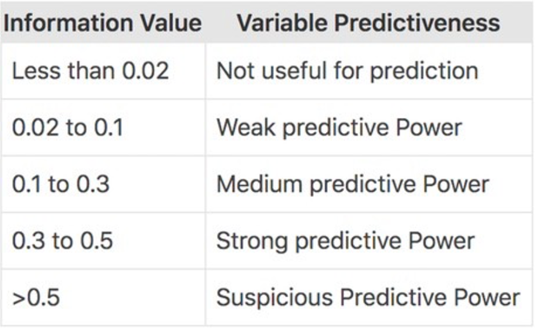

In [19]:
len(variable_names)

11

In [20]:
variable_names

['age',
 'income',
 'OpenCredit_Lines_and_loans',
 'loan_type',
 'loan_amount',
 'term',
 'property_value',
 'loan_limit',
 'approv_in_adv',
 'LTV',
 'dtir1']

In [21]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

OPTIMAL
[33.5 38.5 44.5 51.5 54.5 57.5 61.5 64.5 67.5 77.5]
age
   Variable Name             Bin  Count  Count (%)  Non-event  Event  \
0            age   (-inf, 33.50)   2950   0.084990        353   2597   
1            age  [33.50, 38.50)   2613   0.075281        265   2348   
2            age  [38.50, 44.50)   3992   0.115010        360   3632   
3            age  [44.50, 51.50)   5840   0.168251        481   5359   
4            age  [51.50, 54.50)   2530   0.072890        186   2344   
5            age  [54.50, 57.50)   2450   0.070585        173   2277   
6            age  [57.50, 61.50)   3158   0.090982        172   2986   
7            age  [61.50, 64.50)   2403   0.069231        107   2296   
8            age  [64.50, 67.50)   2105   0.060645         67   2038   
9            age  [67.50, 77.50)   4339   0.125007        115   4224   
10           age    [77.50, inf)   2330   0.067128         48   2282   

    Event rate       WoE        IV        JS  
0     0.880339   0.63741

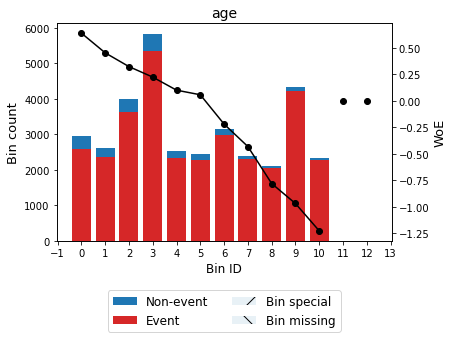

WoE for bin 0 = 0.6374095546919738
WoE for bin 1 = 0.45146435445966066
WoE for bin 2 = 0.32161900115039715
WoE for bin 3 = 0.22238831003233633
WoE for bin 4 = 0.09918623243772356
WoE for bin 5 = 0.055731237855464646
WoE for bin 6 = -0.22114179186425717
WoE for bin 7 = -0.43304121355612546
WoE for bin 8 = -0.7819778849702786
WoE for bin 9 = -0.970551987601422
WoE for bin 10 = -1.2285528100927046
OPTIMAL
[ 2430.  7830.  8670. 16650.]
income
  Variable Name                  Bin  Count  Count (%)  Non-event  Event  \
0        income      (-inf, 2430.00)   2757   0.079430        172   2585   
1        income   [2430.00, 7830.00)  20199   0.581936       1336  18863   
2        income   [7830.00, 8670.00)   1863   0.053673        157   1706   
3        income  [8670.00, 16650.00)   6622   0.190781        452   6170   
4        income      [16650.00, inf)   3269   0.094180        210   3059   

   Event rate       WoE        IV        JS  
0    0.937613 -0.076933  0.000455  0.000057  
1    0.9

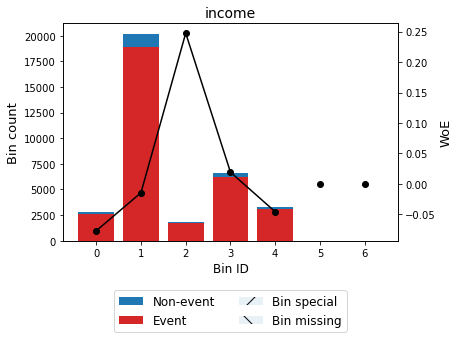

WoE for bin 0 = -0.07693260070765111
WoE for bin 1 = -0.014468546827707917
WoE for bin 2 = 0.2473927867181092
WoE for bin 3 = 0.01928177235422299
WoE for bin 4 = -0.04568210401200929
OPTIMAL
[1.5 2.5]
OpenCredit_Lines_and_loans
                Variable Name           Bin  Count  Count (%)  Non-event  \
0  OpenCredit_Lines_and_loans  (-inf, 1.50)  11714   0.337482        785   
1  OpenCredit_Lines_and_loans  [1.50, 2.50)  11422   0.329069        707   
2  OpenCredit_Lines_and_loans   [2.50, inf)  11574   0.333449        835   

   Event  Event rate       WoE            IV            JS  
0  10929    0.932986 -0.000438  6.463072e-08  8.078840e-09  
1  10715    0.938102 -0.085316  2.308538e-03  2.884797e-04  
2  10739    0.927856  0.078848  2.145183e-03  2.680784e-04  
IV for OpenCredit_Lines_and_loans = 0.004453785020193609
Since IV is less than 0.02, " OpenCredit_Lines_and_loans " is not useful for prediction, thus should be NOT used going forward.


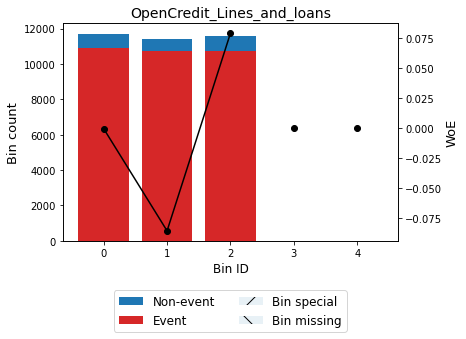

WoE for bin 0 = -0.00043765847283955327
WoE for bin 1 = -0.08531553258967926
WoE for bin 2 = 0.07884818041406452
OPTIMAL
[0.5 1.5 2.5]
loan_type
  Variable Name           Bin  Count  Count (%)  Non-event  Event  Event rate  \
0     loan_type  (-inf, 0.50)  12959   0.373351       1111  11848    0.914268   
1     loan_type  [0.50, 1.50)  12136   0.349640        625  11511    0.948500   
2     loan_type  [1.50, 2.50)   7280   0.209738        405   6875    0.944368   
3     loan_type   [2.50, inf)   2335   0.067272        186   2149    0.920343   

        WoE        IV        JS  
0  0.266155  0.029694  0.003701  
1 -0.280253  0.024348  0.003034  
2 -0.198706  0.007602  0.000949  
3  0.186042  0.002524  0.000315  
IV for loan_type = 0.06416893674198824
Since IV is between 0.02 and 0.5, " loan_type " should be used going forward.
The IV of " loan_type " is 0.06416893674198824 , which is weak predictive power.


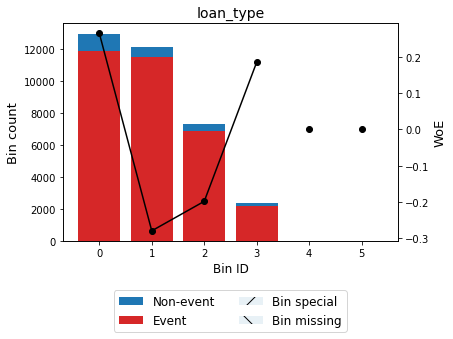

WoE for bin 0 = 0.26615514311342064
WoE for bin 1 = -0.2802530197572351
WoE for bin 2 = -0.19870614600680744
WoE for bin 3 = 0.18604248649211613
OPTIMAL
[  605.36999512  3038.07006836  3801.0300293   4874.07006836
  5696.19018555  6651.92993164  7619.90991211 10442.75976562]
loan_amount
  Variable Name                  Bin  Count  Count (%)  Non-event  Event  \
0   loan_amount       (-inf, 605.37)   7563   0.217891        428   7135   
1   loan_amount    [605.37, 3038.07)   4771   0.137453        440   4331   
2   loan_amount   [3038.07, 3801.03)   2743   0.079026        282   2461   
3   loan_amount   [3801.03, 4874.07)   3658   0.105387        313   3345   
4   loan_amount   [4874.07, 5696.19)   2708   0.078018        204   2504   
5   loan_amount   [5696.19, 6651.93)   2699   0.077759        174   2525   
6   loan_amount   [6651.93, 7619.91)   2059   0.059320        115   1944   
7   loan_amount  [7619.91, 10442.76)   4430   0.127629        217   4213   
8   loan_amount      [10442.

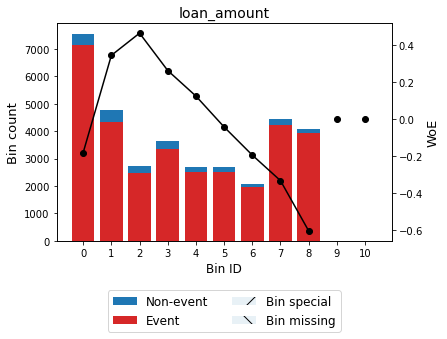

WoE for bin 0 = -0.1805906249077146
WoE for bin 1 = 0.3462746951191057
WoE for bin 2 = 0.4666377299684832
WoE for bin 3 = 0.26403492739924994
WoE for bin 4 = 0.12552897104565275
WoE for bin 5 = -0.04188733307350578
WoE for bin 6 = -0.1945171472357089
WoE for bin 7 = -0.33297919901713147
WoE for bin 8 = -0.6051153183814542
OPTIMAL
[294.]
term
  Variable Name             Bin  Count  Count (%)  Non-event  Event  \
0          term  (-inf, 294.00)   4812   0.138634        348   4464   
1          term   [294.00, inf)  29898   0.861366       1979  27919   

   Event rate       WoE        IV        JS  
0    0.927681  0.081456  0.000953  0.000119  
1    0.933808 -0.013662  0.000160  0.000020  
IV for term = 0.001112751276440301
Since IV is less than 0.02, " term " is not useful for prediction, thus should be NOT used going forward.


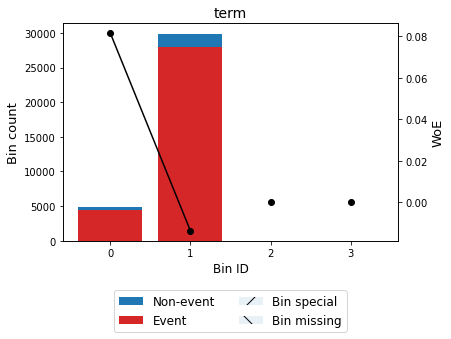

WoE for bin 0 = 0.08145568513475296
WoE for bin 1 = -0.013662084591976072
OPTIMAL
[ 167636.5  497719.5  542421.5  593000.  1099938.5]
property_value
    Variable Name                      Bin  Count  Count (%)  Non-event  \
0  property_value        (-inf, 167636.50)   2126   0.061250        129   
1  property_value   [167636.50, 497719.50)  16748   0.482512       1139   
2  property_value   [497719.50, 542421.50)   2007   0.057822        155   
3  property_value   [542421.50, 593000.00)   1760   0.050706        131   
4  property_value  [593000.00, 1099938.50)   7463   0.215010        497   
5  property_value        [1099938.50, inf)   4606   0.132700        276   

   Event  Event rate       WoE        IV        JS  
0   1997    0.939323 -0.106535  0.000664  0.000083  
1  15609    0.931992  0.015357  0.000115  0.000014  
2   1852    0.922770  0.152457  0.001436  0.000179  
3   1629    0.925568  0.112529  0.000674  0.000084  
4   6966    0.933405 -0.007153  0.000011  0.000001  
5   433

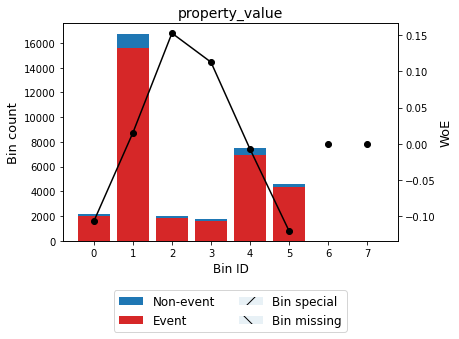

WoE for bin 0 = -0.10653521963271763
WoE for bin 1 = 0.01535672291019433
WoE for bin 2 = 0.15245741113454728
WoE for bin 3 = 0.11252942402053187
WoE for bin 4 = -0.007152715407892427
WoE for bin 5 = -0.11986824585796009
OPTIMAL
[0.5]
loan_limit
  Variable Name           Bin  Count  Count (%)  Non-event  Event  Event rate  \
0    loan_limit  (-inf, 0.50)   3047   0.087785        220   2827    0.927798   
1    loan_limit   [0.50, inf)  31663   0.912215       2107  29556    0.933455   

        WoE        IV        JS  
0   0.07971  0.000577  0.000072  
1 -0.007968  0.000058  0.000007  
IV for loan_limit = 0.0006350888543587407
Since IV is less than 0.02, " loan_limit " is not useful for prediction, thus should be NOT used going forward.


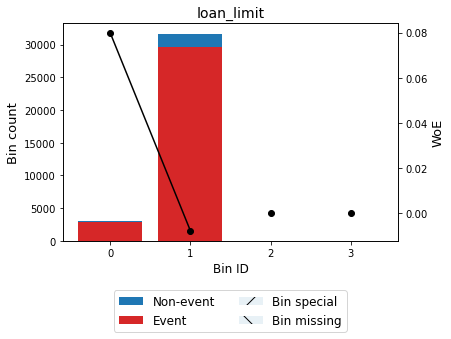

WoE for bin 0 = 0.07970989808019663
WoE for bin 1 = -0.007967924682923783
OPTIMAL
[0.5]
approv_in_adv
   Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  approv_in_adv  (-inf, 0.50)  29315   0.844569       1944  27371   
1  approv_in_adv   [0.50, inf)   5395   0.155431        383   5012   

   Event rate       WoE        IV        JS  
0    0.933686 -0.011683  0.000115  0.000014  
1    0.929008  0.061498  0.000604  0.000075  
IV for approv_in_adv = 0.0007184206550306991
Since IV is less than 0.02, " approv_in_adv " is not useful for prediction, thus should be NOT used going forward.


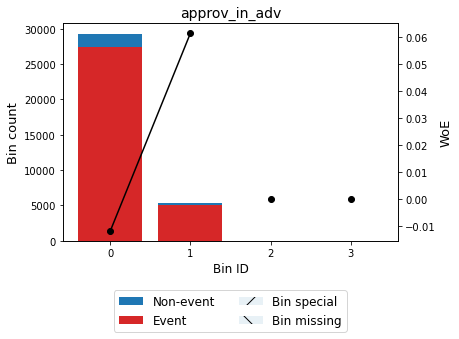

WoE for bin 0 = -0.011682643279150577
WoE for bin 1 = 0.06149838258611247
OPTIMAL
[  67.94913483   72.83940125   75.14415359   78.61532593 3232.        ]
LTV
  Variable Name               Bin  Count  Count (%)  Non-event  Event  \
0           LTV     (-inf, 67.95)  10766   0.310170        709  10057   
1           LTV    [67.95, 72.84)   3068   0.088390        228   2840   
2           LTV    [72.84, 75.14)   1856   0.053472        148   1708   
3           LTV    [75.14, 78.62)   2295   0.066119        160   2135   
4           LTV  [78.62, 3232.00)  14740   0.424661        972  13768   
5           LTV    [3232.00, inf)   1985   0.057188        110   1875   

   Event rate       WoE        IV        JS  
0    0.934145 -0.019115  0.000112  0.000014  
1    0.925684   0.11084  0.001139  0.000142  
2    0.920259  0.187188  0.002032  0.000254  
3    0.930283  0.042006  0.000119  0.000015  
4    0.934057 -0.017693  0.000132  0.000016  
5    0.944584  -0.20283  0.002156  0.000269  
IV for L

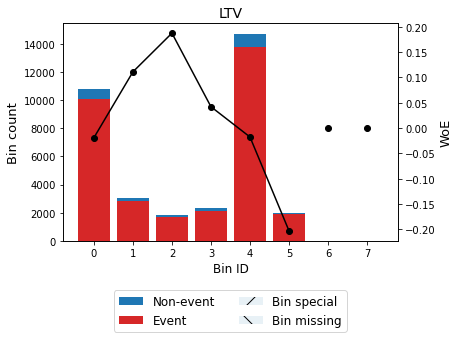

WoE for bin 0 = -0.01911495249092749
WoE for bin 1 = 0.11084000722061445
WoE for bin 2 = 0.18718760883702534
WoE for bin 3 = 0.042005598992527454
WoE for bin 4 = -0.01769282400951088
WoE for bin 5 = -0.20282986319066945
OPTIMAL
[2.01361692e-02 3.20363417e-01 4.65956599e-01 5.67869693e-01
 7.64523417e-01 1.94539809e+00 9.85500000e+02]
dtir1
  Variable Name             Bin  Count  Count (%)  Non-event  Event  \
0         dtir1    (-inf, 0.02)   3116   0.089772        170   2946   
1         dtir1    [0.02, 0.32)  12339   0.355488        723  11616   
2         dtir1    [0.32, 0.47)   5354   0.154249        337   5017   
3         dtir1    [0.47, 0.57)   2343   0.067502        183   2160   
4         dtir1    [0.57, 0.76)   2328   0.067070        228   2100   
5         dtir1    [0.76, 1.95)   2049   0.059032        279   1770   
6         dtir1  [1.95, 985.50)   3269   0.094180        222   3047   
7         dtir1   [985.50, inf)   3912   0.112705        185   3727   

   Event rate     

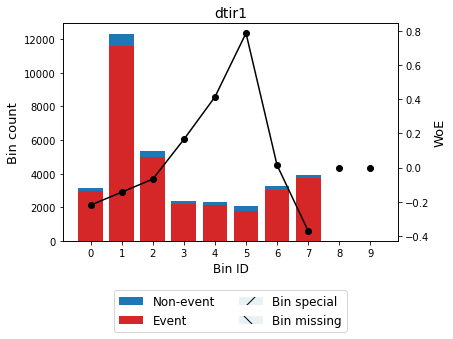

WoE for bin 0 = -0.21935145055088842
WoE for bin 1 = -0.14367580548438713
WoE for bin 2 = -0.06745078471046571
WoE for bin 3 = 0.1646763615846356
WoE for bin 4 = 0.4127067146643519
WoE for bin 5 = 0.7855306656749163
WoE for bin 6 = 0.013818312307995798
WoE for bin 7 = -0.36994936497950826


In [22]:
for variable in variable_names:
    x_in = X_train[variable].values
    y_in = y_train

    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
    optb.fit(x_in, y_in)
    
    print(optb.status)
    print(optb.splits)
    
    binning_table = optb.binning_table
    bt = binning_table.build() #Note that we are assigning the binning table to a variable (bt_age) so that we can use values like WoE later
    
    #create a "complete" list of binning tables that we will use for the final scorecard. 
    #drop the "Specials", "Missing", and "Totals" rows
    bt_to_add = bt[~bt.Bin.str.contains("Special")]
    bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
    bt_to_add = bt_to_add.iloc[:-1 , :]

    #print variable
    print(color.DARKCYAN + variable + color.END)
    
    #prepare the data to be added to bt_complete
    bt_to_add.insert (0, "Variable Name", variable)
    bt_complete=bt_to_add #add these results to the complete results
    print(bt_complete)
           
    #check for IV
    x = sum(bt_complete['IV'])
    
    print('IV for', variable, '=', x)
    
    #analysis of IV value
    if x > 0.02 and x <0.5:
        print('Since IV is between 0.02 and 0.5, "', variable, '" should be used going forward.')
        if x < 0.1:
            print('The IV of "', variable, '" is', x, ', which is weak predictive power.')
        elif x < 0.3:
            print('The IV of "', variable, '" is', x, ', which is medium predictive power.')
        else: 
            print('The IV of "', variable, '" is', x, ', which is strong predictive power.')
    elif x < 0.02:
        print('Since IV is less than 0.02, "', variable, '" is not useful for prediction, thus should be NOT used going forward.')
    else:
        print('Since IV is less than 0.02, ""', variable, '" has suspicious predictive power, thus should be NOT used going forward.')
    
    #check for monotonic value
    binning_table.plot(metric = 'woe')
    
    #check for WoE values
    for i in range(0, len(bt_complete['Bin'])):
        gd = bt_complete['Non-event'][i]/bt_complete['Non-event'].sum()
        bd = bt_complete['Event'][i]/bt_complete['Event'].sum()
        WoE = np.log(gd/bd)
        print("WoE for bin", i, "=", WoE)

### Short Analysis of "age" - ACCEPT
IV for age = 0.2694785121909092

Since IV is between 0.02 and 0.5, " age " should be used going forward.
The IV of " age " is 0.2694785121909092 , which is medium predictive power.

The WoE is also monotonically decreasing, so we will definitely use this variable going forward.

### Short Analysis of "income" - REJECT
IV for income = 0.004498192359717043

Since IV is less than 0.02, " income " is not useful for prediction, thus should be NOT used going forward.

The WoE is also not monotonically increasing/ decreasing, so we will not use this variable going forward.

### Short Analysis of "OpenCredit_Lines_and_loans" - REJECT
IV for OpenCredit_Lines_and_loans = 0.004453785020193609

Since IV is less than 0.02, " OpenCredit_Lines_and_loans " is not useful for prediction, thus should be NOT used going forward.

The WoE is also not monotonically increasing/ decreasing, so we will not use this variable going forward.

### Short Analysis of "loan_type" - ACCEPT
IV for loan_type = 0.06416893674198824

Since IV is between 0.02 and 0.5, " loan_type " should be used going forward.
The IV of " loan_type " is 0.06416893674198824 , which is weak predictive power.

The WoE is not monotonically increasing/ decreasing (decreasing from bin 0 to bin 1, but increasing thereafter).

### Short Analysis of "loan_amount" - ACCEPT
IV for loan_amount = 0.10412835900664005

Since IV is between 0.02 and 0.5, " loan_amount " should be used going forward.
The IV of " loan_amount " is 0.10412835900664005 , which is medium predictive power.
 
The WoE is not monotonically increasing/ decreasing (increasing from bin 0 to bin 2, but decreasing thereafter).

### Short Analysis of "term" - REJECT
IV for term = 0.001112751276440301

Since IV is less than 0.02, " term " is not useful for prediction, thus should be NOT used going forward.

The WoE is monotonically decreasing, but there are only 2 bins, so we will depend IV to decide whether to accept/ reject this variable. 

### Short Analysis of "property_value" - REJECT
IV for property_value = 0.0047101834780244566

Since IV is less than 0.02, " property_value " is not useful for prediction, thus should be NOT used going forward.

The WoE is monotonically decreasing, but there are only 2 bins, so we will depend IV to decide whether to accept/ reject this variable. 

### Short Analysis of "loan_limit" - REJECT
IV for loan_limit = 0.0006350888543587407

Since IV is less than 0.02, " loan_limit " is not useful for prediction, thus should be NOT used going forward.

The WoE is monotonically decreasing, but there are only 2 bins, so we will depend IV to decide whether to accept/ reject this variable. 

### Short Analysis of "approv_in_adv" - REJECT
IV for approv_in_adv = 0.0007184206550306991

Since IV is less than 0.02, " approv_in_adv " is not useful for prediction, thus should be NOT used going forward.

The WoE is monotonically increasing, but there are only 2 bins, so we will depend IV to decide whether to accept/ reject this variable. 

### Short Analysis of "LTV" - REJECT
IV for LTV = 0.00569093263645927

Since IV is less than 0.02, " LTV " is not useful for prediction, thus should be NOT used going forward.

The WoE is also not monotonically increasing/ decreasing, so we will not use this variable going forward.

### Short Analysis of "dtir1" - ACCEPT
IV for dtir1 = 0.09158056113568605

Since IV is between 0.02 and 0.5, " dtir1 " should be used going forward.
The IV of " dtir1 " is 0.09158056113568605 , which is weak predictive power.

The WoE is not monotonically increasing/ decreasing, but only starts decreasing after the bin =5.

We have accepted variables: "age", "loan_type", "loan_amount", "dtir1"; and will be using them for computation of the logistic regression.

# Section 3:

Generate a manual scorecard based on the Information Value (between 0.02 to 0.5) and perform the following.

1. Create a WOE transform matrix.
2. Compute the Logistic Regression and Regression Intercept.
2. Compute and print the scorecard manually.
3. Compare the WOE values generated in the manual scorecard to the WOE values generated in Q1.

Note: Refer to the appropriate formulas (factor, offset, score) in the credit scoring notes.

## WOE transform matrix

#### Age

In [23]:
variable = 'age'

x_in = X_train[variable].values
y_in = y_train

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x_in, y_in)

print(optb.status)
print(optb.splits)
    
binning_table = optb.binning_table
bt_age = binning_table.build() 

OPTIMAL
[33.5 38.5 44.5 51.5 54.5 57.5 61.5 64.5 67.5 77.5]


In [24]:
#create a "complete" list of binning tables that we will use for the final scorecard. 

#drop the "Specials", "Missing", and "Totals" rows
bt_to_add = bt_age[~bt_age.Bin.str.contains("Special")]
bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
bt_to_add = bt_to_add.iloc[:-1 , :]

#prepare the data to be added to bt_complete
bt_to_add.insert (0, "Variable Name", "Age")
bt_complete=bt_to_add #add these results to the complete results

In [25]:
x_transform_age= optb.transform(X_train.age, metric='woe')
X_trans = pd.DataFrame({'age_woe_trans':x_transform_age})
X_trans.head()

,age_woe_trans
0,-1.228553
1,0.321619
2,0.099186
3,0.222388
4,-0.781978


#### Loan Type

In [26]:
variable = 'loan_type'

x_in = X_train[variable].values
y_in = y_train

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x_in, y_in)

print(optb.status)
print(optb.splits)
    
binning_table = optb.binning_table
bt_loan_type = binning_table.build() 

OPTIMAL
[0.5 1.5 2.5]


In [27]:
#Again, add these results to the complete result
bt_loan_type.insert (0, "Variable Name", "Loan Type")

#drop the "Specials", "Missing", and "Totals" rows
bt_to_add = bt_loan_type[~bt_loan_type.Bin.str.contains("Special")]
bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
bt_to_add = bt_to_add.iloc[:-1 , :]#remove "Totals"

bt_complete = pd.concat([bt_complete, bt_loan_type], ignore_index=True, axis=0)

In [28]:
x_transform_loan_type= optb.transform(X_train.loan_type, metric='woe')
X_trans['loan_type_woe_trans']=x_transform_loan_type
X_trans.head()

,age_woe_trans,loan_type_woe_trans
0,-1.228553,0.266155
1,0.321619,-0.280253
2,0.099186,-0.280253
3,0.222388,-0.198706
4,-0.781978,0.266155


#### Loan Amount

In [29]:
variable = 'loan_amount'

x_in = X_train[variable].values
y_in = y_train

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x_in, y_in)

print(optb.status)
print(optb.splits)
    
binning_table = optb.binning_table
bt_loan_amt = binning_table.build() 

OPTIMAL
[  605.36999512  3038.07006836  3801.0300293   4874.07006836
  5696.19018555  6651.92993164  7619.90991211 10442.75976562]


In [30]:
#Again, add these results to the complete result
bt_loan_amt.insert (0, "Variable Name", "Loan Type")

#drop the "Specials", "Missing", and "Totals" rows
bt_to_add = bt_loan_amt[~bt_loan_amt.Bin.str.contains("Special")]
bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
bt_to_add = bt_to_add.iloc[:-1 , :]#remove "Totals"

bt_complete = pd.concat([bt_complete, bt_loan_amt], ignore_index=True, axis=0)

In [31]:
x_transform_loan_amount= optb.transform(X_train.loan_amount, metric='woe')
X_trans['loan_amount_woe_trans']=x_transform_loan_amount
X_trans.head()

,age_woe_trans,loan_type_woe_trans,loan_amount_woe_trans
0,-1.228553,0.266155,0.346275
1,0.321619,-0.280253,-0.332979
2,0.099186,-0.280253,-0.332979
3,0.222388,-0.198706,-0.332979
4,-0.781978,0.266155,-0.180591


#### Debt to income ratio

In [32]:
variable = 'dtir1'

x_in = X_train[variable].values
y_in = y_train

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x_in, y_in)

print(optb.status)
print(optb.splits)
    
binning_table = optb.binning_table
bt_dtir1 = binning_table.build() 

OPTIMAL
[2.01361692e-02 3.20363417e-01 4.65956599e-01 5.67869693e-01
 7.64523417e-01 1.94539809e+00 9.85500000e+02]


In [33]:
#Again, add these results to the complete result
bt_dtir1.insert (0, "Variable Name", "Loan Type")

#drop the "Specials", "Missing", and "Totals" rows
bt_to_add = bt_dtir1[~bt_dtir1.Bin.str.contains("Special")]
bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
bt_to_add = bt_to_add.iloc[:-1 , :]#remove "Totals"

bt_complete = pd.concat([bt_complete, bt_dtir1], ignore_index=True, axis=0)

In [34]:
x_transform_dtir1= optb.transform(X_train.dtir1, metric='woe')
X_trans['dtir1_woe_trans']=x_transform_dtir1
X_trans.head(11)

,age_woe_trans,loan_type_woe_trans,loan_amount_woe_trans,dtir1_woe_trans
0,-1.228553,0.266155,0.346275,-0.143676
1,0.321619,-0.280253,-0.332979,-0.143676
2,0.099186,-0.280253,-0.332979,-0.067451
3,0.222388,-0.198706,-0.332979,-0.143676
4,-0.781978,0.266155,-0.180591,0.013818
5,0.637410,-0.280253,-0.041887,-0.143676
6,-0.781978,-0.198706,0.264035,0.164676
7,0.055731,-0.280253,0.346275,0.785531
8,-0.970552,-0.280253,0.346275,-0.067451
9,-0.433041,-0.198706,-0.332979,-0.143676


In [35]:
bt_complete

,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,Age,"(-inf, 33.50)",2950,0.084990,353,2597,0.880339,0.63741,0.045575,0.005602
1,Age,"[33.50, 38.50)",2613,0.075281,265,2348,0.898584,0.451464,0.018679,0.002315
2,Age,"[38.50, 44.50)",3992,0.115010,360,3632,0.909820,0.321619,0.013684,0.001703
3,Age,"[44.50, 51.50)",5840,0.168251,481,5359,0.917637,0.222388,0.009166,0.001143
4,Age,"[51.50, 54.50)",2530,0.072890,186,2344,0.926482,0.099186,0.000749,0.000094
5,Age,"[54.50, 57.50)",2450,0.070585,173,2277,0.929388,0.055731,0.000225,0.000028
6,Age,"[57.50, 61.50)",3158,0.090982,172,2986,0.945535,-0.221142,0.004046,0.000505
7,Age,"[61.50, 64.50)",2403,0.069231,107,2296,0.955472,-0.433041,0.010791,0.001338
8,Age,"[64.50, 67.50)",2105,0.060645,67,2038,0.968171,-0.781978,0.026698,0.003255
9,Age,"[67.50, 77.50)",4339,0.125007,115,4224,0.973496,-0.970552,0.078633,0.009461


## Logistic Regression
We now have all of the variable we want included in the scorecard, and we have replaced the values of the original values with the corresponding WoE value for the bin the value falls in. We can now run the regression on X_trans, the WoE values, with the original good/bad (defaulted flag) values, y_train. 

In [36]:
clf = LogisticRegression(solver="lbfgs").fit(X_trans, y_train)

Let's take a look at the co-efficients and intercept of the regression.

In [37]:
print("Regression Co-efficients:",np.round(clf.coef_[0],5))
print("Regression Intercept: ",np.round(clf.intercept_,5))
intr = np.round(clf.intercept_,5)

Regression Co-efficients: [-0.8733  -0.99562 -0.53226 -0.95815]
Regression Intercept:  [2.63087]


In [38]:
scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,age,0,"(-inf, 33.50)",2950,0.084990,353,2597,0.880339,0.637410,0.045575,0.005602,-0.873297,118.864431
1,age,1,"[33.50, 38.50)",2613,0.075281,265,2348,0.898584,0.451464,0.018679,0.002315,-0.873297,114.178979
2,age,2,"[38.50, 44.50)",3992,0.115010,360,3632,0.909820,0.321619,0.013684,0.001703,-0.873297,110.907132
3,age,3,"[44.50, 51.50)",5840,0.168251,481,5359,0.917637,0.222388,0.009166,0.001143,-0.873297,108.406715
4,age,4,"[51.50, 54.50)",2530,0.072890,186,2344,0.926482,0.099186,0.000749,0.000094,-0.873297,105.302266
5,age,5,"[54.50, 57.50)",2450,0.070585,173,2277,0.929388,0.055731,0.000225,0.000028,-0.873297,104.207285
6,age,6,"[57.50, 61.50)",3158,0.090982,172,2986,0.945535,-0.221142,0.004046,0.000505,-0.873297,97.230631
7,age,7,"[61.50, 64.50)",2403,0.069231,107,2296,0.955472,-0.433041,0.010791,0.001338,-0.873297,91.891184
8,age,8,"[64.50, 67.50)",2105,0.060645,67,2038,0.968171,-0.781978,0.026698,0.003255,-0.873297,83.098668
9,age,9,"[67.50, 77.50)",4339,0.125007,115,4224,0.973496,-0.970552,0.078633,0.009461,-0.873297,78.346973


## Short Analysis
We can see that the co-efficients from the regression are the same are those shown in detailed description of the scorecard from Question 1. 

The final step is to generate the scorecard points. However, at this point, we have all of the components needed to generate the scorecard. For the scaling process:

The computation is:

$\text{factor} =  \frac{pdo}{\ln \left( 2 \right)}$

where PDO is the "Points to Double Odds". This could be any positive value, but in traditional scorecards, this value is typically 20. This is also the value that was used for the scaling in part one.

$\text{offset} = \text{Target Score} — \left( \text{factor} \times \ln \left( \text{Target Odds} \right) \right)$

where the "Target score" is some chosen value (often it is 600 points in a typical scorecard), and the target odds are the probability of default for that number of points. So, if the probabiliy of default is to be 1 in 50, we use the value 50. These were also the values used in part one. 

Finally, the score for bin *i* is computed as:

$\text{score}_i = -\left( \beta_i \times WoE_i  + \frac{\alpha}{n} \right) \times \text{factor} + \frac{\text{offset}}{n}$

Where $\beta_i$ is the co-efficient from the regression corresponding to the variable (in this case we only have six). $\alpha$ is the intercept from the regression, and *n* is the number of variables used in the computation (in this case, we have 4).

In [39]:
factor = 20/np.log(2)
offset = 600 - (factor * np.log(50))
n = clf.coef_.shape[1] #this is the number of independent variable we have
print("factor: ", factor,"\noffset: ",offset)

factor:  28.85390081777927 
offset:  487.1228762045055


## Final Scorecard Generation
All of the components are in place, and we have the following
* bt_complete is a dataframe which contains all of the WoE information, the bins for each variable, and the variable name
* co-efficients from the Logistic Regression, one corresponding to each variable
* the intercept from the Logistic Regression

We just need to map the co-efficient to the corrsponding variable, and do the computation listed a few cells above

In [40]:
coeff_dict={"Age":clf.coef_[0][0],
            "Loan Type":clf.coef_[0][1],
            "Loan Amount":clf.coef_[0][2],
            "dtir1":clf.coef_[0][3]}

In [41]:
for index, row in bt_complete.iterrows():
    bt_complete['points'] =bt_complete.apply(lambda row : -(pd.to_numeric(row.WoE, errors='coerce')*
                                                           coeff_dict[row['Variable Name']]+intr/n)*factor+offset/n, axis=1)
bt_complete

,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,points
0,Age,"(-inf, 33.50)",2950,0.084990,353,2597,0.880339,0.63741,0.045575,0.005602,[118.86446674395839]
1,Age,"[33.50, 38.50)",2613,0.075281,265,2348,0.898584,0.451464,0.018679,0.002315,[114.17901455784296]
2,Age,"[38.50, 44.50)",3992,0.115010,360,3632,0.909820,0.321619,0.013684,0.001703,[110.90716783225002]
3,Age,"[44.50, 51.50)",5840,0.168251,481,5359,0.917637,0.222388,0.009166,0.001143,[108.40675019281653]
4,Age,"[51.50, 54.50)",2530,0.072890,186,2344,0.926482,0.099186,0.000749,0.000094,[105.30230090841218]
5,Age,"[54.50, 57.50)",2450,0.070585,173,2277,0.929388,0.055731,0.000225,0.000028,[104.20732077927357]
6,Age,"[57.50, 61.50)",3158,0.090982,172,2986,0.945535,-0.221142,0.004046,0.000505,[97.23066668572395]
7,Age,"[61.50, 64.50)",2403,0.069231,107,2296,0.955472,-0.433041,0.010791,0.001338,[91.8912193250911]
8,Age,"[64.50, 67.50)",2105,0.060645,67,2038,0.968171,-0.781978,0.026698,0.003255,[83.09870363847669]
9,Age,"[67.50, 77.50)",4339,0.125007,115,4224,0.973496,-0.970552,0.078633,0.009461,[78.3470082985917]


# Scorecard Build Results
Comparing the final scorecard generated in part two to the scorecard generated in Question 1, the results are the same (or very close). Reproducing the "optimal binning" from the optimal binning library would be quite difficult. However, you can bin the variables using the basic  assumptions mentioned earlier. Furthermore, mapping the Variable to a bin and a given WoE (where the Optimal Binning "transform" function was used in this notebook should be straight-forward to implement. 

In [42]:
scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,age,0,"(-inf, 33.50)",2950,0.084990,353,2597,0.880339,0.637410,0.045575,0.005602,-0.873297,118.864431
1,age,1,"[33.50, 38.50)",2613,0.075281,265,2348,0.898584,0.451464,0.018679,0.002315,-0.873297,114.178979
2,age,2,"[38.50, 44.50)",3992,0.115010,360,3632,0.909820,0.321619,0.013684,0.001703,-0.873297,110.907132
3,age,3,"[44.50, 51.50)",5840,0.168251,481,5359,0.917637,0.222388,0.009166,0.001143,-0.873297,108.406715
4,age,4,"[51.50, 54.50)",2530,0.072890,186,2344,0.926482,0.099186,0.000749,0.000094,-0.873297,105.302266
5,age,5,"[54.50, 57.50)",2450,0.070585,173,2277,0.929388,0.055731,0.000225,0.000028,-0.873297,104.207285
6,age,6,"[57.50, 61.50)",3158,0.090982,172,2986,0.945535,-0.221142,0.004046,0.000505,-0.873297,97.230631
7,age,7,"[61.50, 64.50)",2403,0.069231,107,2296,0.955472,-0.433041,0.010791,0.001338,-0.873297,91.891184
8,age,8,"[64.50, 67.50)",2105,0.060645,67,2038,0.968171,-0.781978,0.026698,0.003255,-0.873297,83.098668
9,age,9,"[67.50, 77.50)",4339,0.125007,115,4224,0.973496,-0.970552,0.078633,0.009461,-0.873297,78.346973


# Section 4

Perform a basic scoring procedure for the following:

1. Compute the scorecard using the X_test dataset.
2. Perform a sanity check.
3. Analyze the scorecard values for X_test and y_test to determine how many records are defaulted for the given dataset.

### Computing scorecard using X_test dataset

In [43]:
X_test.head(2)

,age,income,OpenCredit_Lines_and_loans,loan_type,loan_amount,term,property_value,loan_limit,approv_in_adv,LTV,dtir1
14318,47,5760,2,1,7309.32,360,558000,1,0,58.512545,0.184596
24751,70,4800,1,0,6341.34,360,268000,1,0,84.514925,0.217755


The first record in the test set is 14318. 

| variable | value | corresponding points|
|---|---|---|
| age | 47 | 108.406715 |
| income | 5760 | not used |
| OpenCredit_Lines_and_loans | 2 | not used |
| loan_type | 1 | 94.752025 |
| loan_amount | 7309.32 | 99.815642 |
| term | 360 | not used |
| property_value | 558000 | not used |
| loan_limit | 1 | not used |
| approv_in_adv | 0 | not used |
| LTV | 58.512545 | not used |
| dtir1 | 0.184596 | 98.830843 |
| **Total** | |**401.8052** |

In [44]:
X_test_score = scorecard.score(X_test)
print(X_test_score)

[401.8052249  389.78640859 438.11361729 ... 380.89511636 384.32331813
 420.36386191]


As expected, the value for the first record matches the Total from the manually computed value. We can now start to do some analysis in the results as we have the scorecard values for X_test, as well as y_test which tells us if the record defaulted or not.

## Basic sanity check

Since we set the score of 600 to be the value at which we have a 1:50 probability of default, let's see how many did at that value and above.

In [45]:
df = pd.DataFrame({"score":X_test_score, "good_bad":y_test})

In [46]:
print("total number of records :",df.score.count())
print("total number of records where score >= 600 :",df.score[df.score >= 600].count())

total number of records : 14877
total number of records where score >= 600 : 0


This shows that none of the records meet the cutoff to be given a loan.

Let's check the max score:

In [47]:
max(X_test_score)

461.95437885813

To explore further, since the max score is only 461.95, let's reduce the cutoff to 460, we expect 0.390625:1 probability of default

In [48]:
print("total number of records :",df.score.count())
print("total number of records where score >= 460 :",df.score[df.score >= 460].count())

total number of records : 14877
total number of records where score >= 460 : 13


In [49]:
13/0.390625

33.28

There are 13 records where score >= 400, so we expect about 33.28 defaults. That is higher than the number of records. Thus, we should not be giving the loan to this group of records since the score is much lower than 600. We can test on another test set or add more variables to improve our model.

In [50]:
print("total number of records where score >= 460 and defaulted :",np.count_nonzero(np.logical_and(df.score >= 460 , df.good_bad==1)))

total number of records where score >= 460 and defaulted : 10


Slightly lower than expected. However, we do expect some variance, and we could measure the variance by repeating the process. This binning + WoE computation + Logistic Regression + Analysis can be put in a pipeline and run repeatedly (k-fold cross validation) to get an approximation for this variable.

In [51]:
print("total number of records where score >= 440 :",df.score[df.score >= 440].count())
print("total number of records where score >= 440 and defaulted:",np.count_nonzero(np.logical_and(df.score >= 440 , df.good_bad==1)))

total number of records where score >= 440 : 363
total number of records where score >= 440 and defaulted: 303


### Standard ML Prediction analysis

Using some of the analysis functions available in Optimal Binning, let's look at standard analytical tests.

In [52]:
y_pred = scorecard.predict_proba(X_test)[:, 1]

We can plot the ROC of the prediction result. An AUC of 0.68285 isn't that great. It may be a big factor as to why the resulting scorecard is rather conservative in Probability of Default (PD). The defaulting rate in our sanity check is somewhat below what we may expect. 

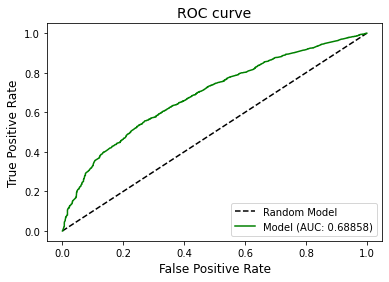

In [53]:
plot_auc_roc(y_test, y_pred)

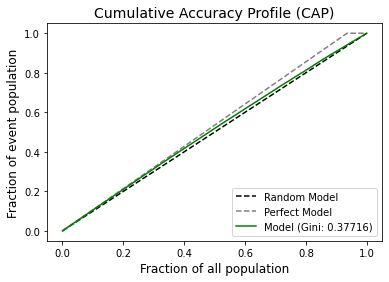

In [54]:
plot_cap(y_test, y_pred)

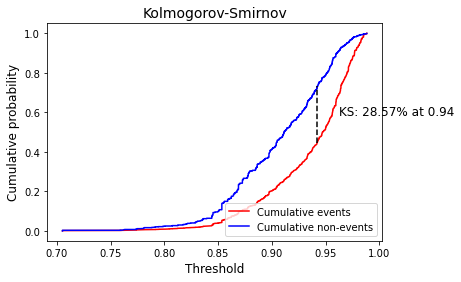

In [55]:
plot_ks(y_test, y_pred)

In [56]:
score = scorecard.score(X_test)

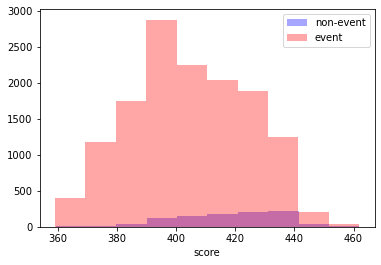

In [57]:
mask = y_test == 0
plt.hist(score[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score")
plt.legend()
plt.show()